In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import cmocean as cmo

# cartopy 
import cartopy.crs as ccrs       # ccrs contains information about projections
import cartopy    
import cartopy.feature as cfeature
from cartopy.mpl.ticker import (LongitudeFormatter, LatitudeFormatter,
                                LatitudeLocator)
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LATITUDE_FORMATTER, LONGITUDE_FORMATTER

List of files with good swaths:
May 18 138/A2021138.L3m_DAY_CHL_chlor_a_4km.nc
May 22 142/A2021142.L3m_DAY_CHL_chlor_a_4km.nc  
May 23 143/A2021143.L3m_DAY_CHL_chlor_a_4km.nc  
May 24 144/A2021144.L3m_DAY_CHL_chlor_a_4km.nc 
May 25 145/A2021145.L3m_DAY_CHL_chlor_a_4km.nc
May 26 146/A2021146.L3m_DAY_CHL_chlor_a_4km.nc 
May 27 147/A2021147.L3m_DAY_CHL_chlor_a_4km.nc  
May 28 148/A2021148.L3m_DAY_CHL_chlor_a_4km.nc  
May 29 149/A2021149.L3m_DAY_CHL_chlor_a_4km.nc  
May 30 150/A2021150.L3m_DAY_CHL_chlor_a_4km.nc  
May 31 151/A2021151.L3m_DAY_CHL_chlor_a_4km.nc  


MoviePy?

In [2]:
#url = 'https://oceandata.sci.gsfc.nasa.gov:443/opendap/MODISA/L3SMI/2021/275/A2021275.L3m_DAY_CHL_chl_ocx_4km.nc'

In [3]:
modis = xr.open_dataset('https://oceandata.sci.gsfc.nasa.gov:443/opendap/MODISA/L3SMI/2021/142/A2021142.L3m_DAY_CHL_chlor_a_4km.nc')

In [4]:
subset_modis = modis.where( (modis.lon>=-173.5)&(modis.lon<-147)& (modis.lat>=51)&(modis.lat<73), drop=True)

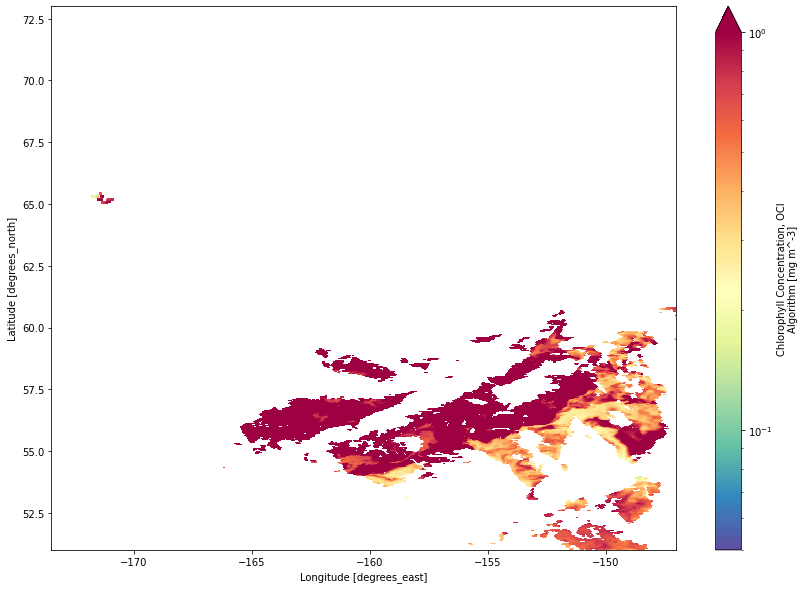

In [5]:
fig, ax = plt.subplots(figsize=(14,10))

subset_modis.chlor_a.plot.pcolormesh(
    x='lon',y='lat', 
    norm=colors.LogNorm(vmin=0.05,vmax=1),
    cmap='Spectral_r'
)

In [15]:
base_url = 'https://oceandata.sci.gsfc.nasa.gov:443/opendap/MODISA/L3SMI/2021/'
year_day = str(360)


filename = 'A2021' + year_day + '.L3m_DAY_CHL_chlor_a_4km.nc'

url = base_url + year_day + '/' + filename

In [16]:
year_day

'360'

In [17]:
for day in range(120,130):
    year_day = str(day)

    filename = 'A2021' + year_day + '.L3m_DAY_CHL_chlor_a_4km.nc'
    url = base_url + year_day + '/' + filename
    modis2 = xr.open_dataset(url)
    subset = modis2.where( (modis.lon>=-173.5)&(modis.lon<-147)& (modis.lat>=51)&(modis.lat<73), drop=True)
    
    print(url)

https://oceandata.sci.gsfc.nasa.gov:443/opendap/MODISA/L3SMI/2021/120/A2021120.L3m_DAY_CHL_chlor_a_4km.nc
https://oceandata.sci.gsfc.nasa.gov:443/opendap/MODISA/L3SMI/2021/121/A2021121.L3m_DAY_CHL_chlor_a_4km.nc
https://oceandata.sci.gsfc.nasa.gov:443/opendap/MODISA/L3SMI/2021/122/A2021122.L3m_DAY_CHL_chlor_a_4km.nc
https://oceandata.sci.gsfc.nasa.gov:443/opendap/MODISA/L3SMI/2021/123/A2021123.L3m_DAY_CHL_chlor_a_4km.nc
https://oceandata.sci.gsfc.nasa.gov:443/opendap/MODISA/L3SMI/2021/124/A2021124.L3m_DAY_CHL_chlor_a_4km.nc
https://oceandata.sci.gsfc.nasa.gov:443/opendap/MODISA/L3SMI/2021/125/A2021125.L3m_DAY_CHL_chlor_a_4km.nc
https://oceandata.sci.gsfc.nasa.gov:443/opendap/MODISA/L3SMI/2021/126/A2021126.L3m_DAY_CHL_chlor_a_4km.nc
https://oceandata.sci.gsfc.nasa.gov:443/opendap/MODISA/L3SMI/2021/127/A2021127.L3m_DAY_CHL_chlor_a_4km.nc
https://oceandata.sci.gsfc.nasa.gov:443/opendap/MODISA/L3SMI/2021/128/A2021128.L3m_DAY_CHL_chlor_a_4km.nc
https://oceandata.sci.gsfc.nasa.gov:443/openda

In [18]:

subset

<xarray.Dataset>
Dimensions:  (rgb: 3, eightbitcolor: 256, lon: 636, lat: 528)
Coordinates:
  * lat      (lat) float32 72.98 72.94 72.9 72.85 ... 51.15 51.1 51.06 51.02
  * lon      (lon) float32 -173.5 -173.4 -173.4 -173.4 ... -147.1 -147.1 -147.0
Dimensions without coordinates: rgb, eightbitcolor
Data variables:
    palette  (rgb, eightbitcolor, lon, lat) float64 -109.0 -109.0 ... 0.0 0.0
    chlor_a  (lat, lon) float32 nan nan nan nan nan nan ... nan nan nan nan nan
Attributes: (12/64)
    product_name:                      A2021129.L3m_DAY_CHL_chlor_a_4km.nc
    instrument:                        MODIS
    title:                             MODISA Level-3 Standard Mapped Image
    project:                           Ocean Biology Processing Group (NASA/G...
    platform:                          Aqua
    temporal_range:                    day
    ...                                ...
    keywords:                          Earth Science > Oceans > Ocean Chemist...
    keywords_vocabulary:               NASA Global Change Master Directory (G...
    _NCProperties:                     version=2,netcdf=4.7.3,hdf5=1.12.0,
    data_bins:                         Attribute edlided: Unsupported attribu...
    data_minimum:                      0.0036158755
    data_maximum:                      99.642494

ValueError: ('lat', 'lon') must be a permuted list of ('time', 'lat', 'lon'), unless `...` is included

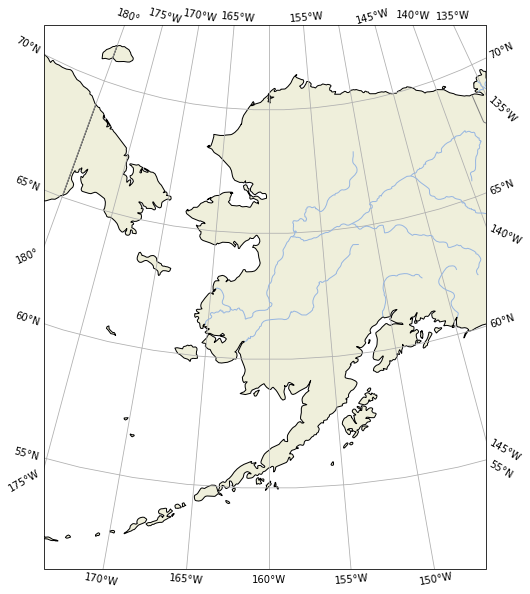

In [20]:
fig = plt.figure(figsize=(10,10))
regional_extent = [-173.5, -147, 51, 73]
ax = plt.axes(projection=ccrs.NorthPolarStereo(central_longitude=-160))
ax.set_extent(regional_extent)


ax.add_feature(cartopy.feature.LAND,edgecolor='black',zorder=1) 
ax.add_feature(cartopy.feature.RIVERS,zorder=2)

states = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_1_states_provinces_lines',
    scale='50m',
    facecolor='none'
)
ax.add_feature(states, edgecolor='gray', zorder=3)

gl = ax.gridlines(crs=ccrs.PlateCarree(),
                  draw_labels=True, 
                  dms=True, 
                  x_inline=False, 
                  y_inline=False
)
gl.xlocator = mticker.FixedLocator(np.arange(-180,-130,5))
gl.ylocator = mticker.FixedLocator(np.arange(50,75,5))
ax.xaxis.set_major_formatter(LONGITUDE_FORMATTER) 
ax.yaxis.set_major_formatter(LATITUDE_FORMATTER)

im = subset_modis.chlor_a.plot.pcolormesh(x='lon',
                                          y='lat', 
                                          norm=colors.LogNorm(vmin=0.1,vmax=5),
                                          cmap='Spectral_r',
                                          transform=ccrs.PlateCarree(),
)

In [21]:
for day in range(120,130):
    year_day = str(day)

    filename = 'A2021' + year_day + '.L3m_DAY_CHL_chlor_a_4km.nc'
    time  = filename[1:5] + year_day
    url = base_url + year_day + '/' + filename
    modis2 = xr.open_dataset(url)
    subset = modis2.where( (modis.lon>=-173.5)&(modis.lon<-147)& (modis.lat>=51)&(modis.lat<73), drop=True)
    fig = plt.figure(figsize=(10,10))
    regional_extent = [-173.5, -147, 51, 73]
    ax = plt.axes(projection=ccrs.NorthPolarStereo(central_longitude=-160))
    ax.set_extent(regional_extent)


    ax.add_feature(cartopy.feature.LAND,edgecolor='black',zorder=1) 
    ax.add_feature(cartopy.feature.RIVERS,zorder=2)

    states = cfeature.NaturalEarthFeature(category='cultural',
                                          name='admin_1_states_provinces_lines',
                                          scale='50m',
                                          facecolor='none'
    )
    ax.add_feature(states, edgecolor='gray', zorder=3)

    gl = ax.gridlines(crs=ccrs.PlateCarree(),
                      draw_labels=True, 
                      dms=True, 
                      x_inline=False, 
                      y_inline=False
    )
    gl.xlocator = mticker.FixedLocator(np.arange(-180,-130,5))
    gl.ylocator = mticker.FixedLocator(np.arange(50,75,5))
    ax.xaxis.set_major_formatter(LONGITUDE_FORMATTER) 
    ax.yaxis.set_major_formatter(LATITUDE_FORMATTER)

    im = subset.chlor_a.plot.pcolormesh(x='lon',
                                              y='lat', 
                                              norm=colors.LogNorm(vmin=0.1,vmax=5),
                                              cmap='Spectral_r',
                                              transform=ccrs.PlateCarree(),
    )
    # plt.title(time)
    print(year_day)
    figname = time + '.png'
    fig.savefig('figures/'+figname, bbox_inches='tight', dpi=150)
    plt.close()

120
121
122
123
124
125
126
127
128
129


In [24]:
for day in range(120,130):
    year_day = str(day)

    filename = 'A2021' + year_day + '.L3m_DAY_CHL_chlor_a_4km.nc'
    time  = filename[1:5] + year_day
    url = base_url + year_day + '/' + filename
    modis = xr.open_dataset(url)
    subset_modis = modis.where( (modis.lon>=-173.5)&
                                (modis.lon<-147)& 
                                (modis.lat>=51)&
                                (modis.lat<73), 
                                drop=True
    )
    
    subset_modis['time'] = int(time)
    subset_modis = subset_modis.assign_coords({'time': int(time)}).expand_dims('time')
    
    if day == 200:
        modis_time = subset_modis
    else:
        modis_time2 = xr.merge([modis_time,subset_modis])
        modis_time2 = xr.concat([modis_time,subset_modis],dim='time')
    
    

NameError: name 'modis_time' is not defined

In [ ]:
modis_time